In [1]:
# 1. See detection result first
# 2. File name based on origin name, for double check

import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import torch
from tqdm import tqdm
from pyzbar.pyzbar import decode
from pyzbar import pyzbar


files = glob.glob('./data_newstrategy/*.jpg')

print('Preparing the model')
model = torch.hub.load('ultralytics/yolov5','custom',path = './Models/detector_stickers.pt')
model.iou = 0.1
print(type(model))

Preparing the model


Using cache found in C:\Users\sendr/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2021-12-9 torch 1.8.2+cu111 CUDA:0 (GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients
Adding AutoShape... 


<class 'models.common.AutoShape'>


In [2]:
class Frame:
    def __init__(self, image=None, origin = None, model = None):
        self.image = image
        self.pureimage = np.copy(image)
        self.imageRGB = cv2.cvtColor(np.copy(image), cv2.COLOR_BGR2RGB)
        self.origin = origin 
        self.stickers = self.getStickers(self.imageRGB, model)
        self.finalimage = self.drawFinalImage(self.image, self.stickers)
        
    
    def getStickers (self, imageRGB, model):
        
        df_results = model(np.copy(imageRGB)).pandas().xyxy[0]
        sticker_list = []
        
        if (len(df_results) > 0):
        
            try:
                for i in range (len(df_results)):
                    xmin = int(df_results.iloc[i].xmin)
                    ymin = int(df_results.iloc[i].ymin)
                    xmax = int (df_results.iloc[i].xmax)
                    ymax = int (df_results.iloc[i].ymax)
            
                    sticker_list.append (Sticker(imageRGB[ymin:ymax, xmin:xmax], 
                                         [(xmin, ymin), (xmax, ymax)], 
                                         i))
            except:
                pass
            
        return sticker_list
       
        
    def drawFinalImage (self, image, stickers):
        image2 = None
        for sticker in stickers:
            image2 = cv2.rectangle (image, sticker.location[0], sticker.location[1], (0,255,255),5)
            image2 = cv2.putText(image, sticker.text, sticker.location[0], cv2.FONT_HERSHEY_SIMPLEX, 3, (0,255,255))
            
        return image2
            
    def sendToDir_FinalImage (self, path):
        cv2.imwrite(path, self.finalimage)
        
    '''def sendToDir_Sticker (self, path):
        i = 0
        for sticker in self.stickers:
            cv2.imwrite (path+'Result_'+str(i)+'.jpg', sticker.stickerimage)'''
        
        
  
class Sticker(Frame):
    def __init__ (self, stickerimage, location, order):
        Frame.__init__(self)
        self.stickerimage = stickerimage
        self.location = location
        self.order = order
        self.text = "Label #{}".format(self.order)
   

In [10]:
print('Loading and Predicting...')
imgs = [Frame(cv2.imread(file), file, model) for file in tqdm(files)]

Loading and Predicting...


 37%|██████████████████████████████▏                                                   | 35/95 [00:07<00:14,  4.06it/s]

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\core\src\alloc.cpp:73: error: (-4:Insufficient memory) Failed to allocate 38937600 bytes in function 'cv::OutOfMemoryError'


In [4]:
len(imgs)

95

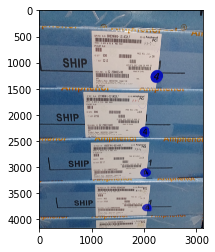

In [5]:
%matplotlib inline
a = imgs[0]
plt.imshow(a.image)

In [7]:
type(a.finalimage)

NoneType

In [9]:
len(a.stickers)

0

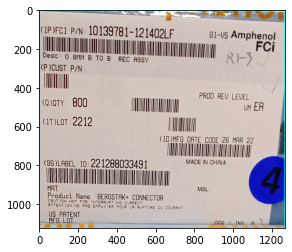

In [10]:
xmin = a.stickers[0].location[0][0]
ymin = a.stickers[0].location[0][1]
xmax = a.stickers[0].location[1][0]
ymax = a.stickers[0].location[1][1]

b = a.image[ymin:ymax, xmin:xmax]
plt.imshow(b)

In [ ]:
plt.imshow(a)

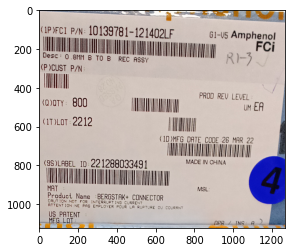

In [12]:
plt.imshow(a.pureimage[ymin:ymax, xmin:xmax])

In [14]:
a.stickers[0].origin

AttributeError: 'Sticker' object has no attribute 'origin'

In [15]:
type(a.stickers[0])

__main__.Sticker